## Aineisto

Tehtävän aineisto on ladattu Tilastokeskuksen [Avoin data](https://stat.fi/org/avoindata/index.html) sivustolta 16.12.2024, ja se sisältää dataa Suomessa sattuneista riistaonnettomuuksista sijainnin mukaan vuosina 2017-2019. Aineisto on yhtenä CSV-tiedostona. 
Riistaonnettomuudet-tilasto on tuotettu kokeellisena tilastona, ja lisätietoa siitä on luettavissa [Riistaonnettomuudet-sivulta](https://stat.fi/tup/kokeelliset-tilastot/riistaonnettomuudet/index.html). 

## Datan tuonti 

Luetaan csv-tiedosto datakehikkoon *df* ja katsotaan, miltä sen alku näyttää.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("riista.csv", encoding = "latin1")

In [13]:
df.head()

,id,tapahtumaAika,vuosi,kuukausi,x,y,kunta,kuntaNimi,maakunta,maakuntaNimi,tielaji,tielajis,tieNumero,tieYllapito,tieYllapitoNimi,riistalaji,riistalajiNimi
0,1,2017-12-10T16:55:00.000+02:00,2017,12,278773.659,6980877.550,743,Seinäjoki,14,Etelä-Pohjanmaa,3,Valtatie,18.0,1.0,Valtio,47507,Metsäkauris
1,2,2017-09-03T13:00:00.000+03:00,2017,9,397501.008,7503083.730,261,Kittilä,19,Lappi,4,Kantatie,80.0,1.0,Valtio,47503,Hirvi
2,3,2017-09-18T07:00:00.000+03:00,2017,9,418353.841,7514104.657,261,Kittilä,19,Lappi,6,Muu maantie,9552.0,1.0,Valtio,47503,Hirvi
3,4,2017-12-01T17:00:00.000+02:00,2017,12,488970.827,6722504.397,285,Kotka,8,Kymenlaakso,5,Seututie,357.0,1.0,Valtio,47629,Valkohäntäpeura
4,5,2017-09-18T07:00:00.000+03:00,2017,9,418766.580,7506930.833,261,Kittilä,19,Lappi,6,Muu maantie,9552.0,1.0,Valtio,47503,Hirvi


Tutkitaan aineistoa hieman:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63942 entries, 0 to 63941
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               63942 non-null  int64  
 1   tapahtumaAika    63942 non-null  object 
 2   vuosi            63942 non-null  int64  
 3   kuukausi         63942 non-null  int64  
 4   x                63938 non-null  float64
 5   y                63938 non-null  float64
 6   kunta            63942 non-null  int64  
 7   kuntaNimi        63942 non-null  object 
 8   maakunta         63942 non-null  int64  
 9   maakuntaNimi     63942 non-null  object 
 10  tielaji          63942 non-null  int64  
 11  tielajis         63942 non-null  object 
 12  tieNumero        54512 non-null  float64
 13  tieYllapito      63938 non-null  float64
 14  tieYllapitoNimi  63942 non-null  object 
 15  riistalaji       63942 non-null  int64  
 16  riistalajiNimi   63942 non-null  object 
dtypes: float64(4

Vaikuttaa siltä, ettei aineisto sisällä puuttuvia arvoja, ja että sarakkeiden tietotyypit ovat oikein. Tämä helpottaa esikäsittelyä, sillä puuttuvia arvoja sisältävien havaintojen käsittelyä ei tarvitse nyt pohtia.    

Tarkastetaan seuraavaksi, sisältääkö data duplikaattirivejä:

In [20]:
duplikaatti = df[df.duplicated()]
duplikaatti

,id,tapahtumaAika,vuosi,kuukausi,x,y,kunta,kuntaNimi,maakunta,maakuntaNimi,tielaji,tielajis,tieNumero,tieYllapito,tieYllapitoNimi,riistalaji,riistalajiNimi


Ei sisällä, mikä on hyvä juttu. Tämä data vaikuttaa siistiltä ja ehjältä jo valmiiksi, ja on periaatteessa valmis analyysiä varten. Lisätään aineistoon kuitenkin uusi sarake *vuodenaika* tapahtumakuukauden perusteella:

In [23]:
vuodenajat = {
    1: "talvi",
    2: "talvi",
    3: "kevät",
    4: "kevät",
    5: "kevät",
    6: "kesä",
    7: "kesä",
    8: "kesä",
    9: "syksy",
    10: "syksy",
    11: "syksy",
    12: "talvi"}

df['vuodenaika'] = df['kuukausi'].map(vuodenajat)     # map-metodin parametrina sanakirja 'vuodenajat'

df.head()

,id,tapahtumaAika,vuosi,kuukausi,x,y,kunta,kuntaNimi,maakunta,maakuntaNimi,tielaji,tielajis,tieNumero,tieYllapito,tieYllapitoNimi,riistalaji,riistalajiNimi,vuodenaika
0,1,2017-12-10T16:55:00.000+02:00,2017,12,278773.659,6980877.550,743,Seinäjoki,14,Etelä-Pohjanmaa,3,Valtatie,18.0,1.0,Valtio,47507,Metsäkauris,talvi
1,2,2017-09-03T13:00:00.000+03:00,2017,9,397501.008,7503083.730,261,Kittilä,19,Lappi,4,Kantatie,80.0,1.0,Valtio,47503,Hirvi,syksy
2,3,2017-09-18T07:00:00.000+03:00,2017,9,418353.841,7514104.657,261,Kittilä,19,Lappi,6,Muu maantie,9552.0,1.0,Valtio,47503,Hirvi,syksy
3,4,2017-12-01T17:00:00.000+02:00,2017,12,488970.827,6722504.397,285,Kotka,8,Kymenlaakso,5,Seututie,357.0,1.0,Valtio,47629,Valkohäntäpeura,talvi
4,5,2017-09-18T07:00:00.000+03:00,2017,9,418766.580,7506930.833,261,Kittilä,19,Lappi,6,Muu maantie,9552.0,1.0,Valtio,47503,Hirvi,syksy


## Datan kuvailu

Tutkitaan seuraavaksi tarkemmin, millaista dataa aineisto sisältää.

In [26]:
df.shape

(63942, 18)

Kuten aiemmin jo huomattiin, aineistossa on noin 64 000 havaintoa (ts. riviä), ja 18 saraketta. Sarakkeet ovat seuraavat:

In [27]:
df.columns

Index(['id', 'tapahtumaAika', 'vuosi', 'kuukausi', 'x', 'y', 'kunta',
       'kuntaNimi', 'maakunta', 'maakuntaNimi', 'tielaji', 'tielajis',
       'tieNumero', 'tieYllapito', 'tieYllapitoNimi', 'riistalaji',
       'riistalajiNimi', 'vuodenaika'],
      dtype='object')

Tutkitaan aineistoa seuraavaksi tilastollisten tunnuslukujen avulla. 

In [24]:
df.describe()

,id,vuosi,kuukausi,x,y,kunta,maakunta,tielaji,tieNumero,tieYllapito,riistalaji
count,63942.000000,63942.000000,63942.000000,63938.000000,6.393800e+04,63942.000000,63942.000000,63942.000000,54512.000000,63938.000000,63942.000000
mean,31971.500000,2019.143192,7.731397,331629.551888,6.801938e+06,488.237794,5.528917,5.134028,5340.253375,5.573212,48345.890088
std,18458.609793,1.379397,3.304244,92556.977805,1.420547e+05,278.793556,4.904538,1.994665,14572.468085,20.213823,10879.514528
min,1.000000,2017.000000,1.000000,184684.566700,6.638455e+06,5.000000,1.000000,1.000000,1.000000,1.000000,47484.000000
25%,15986.250000,2018.000000,5.000000,261715.918760,6.712820e+06,232.000000,2.000000,3.000000,18.000000,1.000000,47507.000000
50%,31971.500000,2019.000000,8.000000,316714.446885,6.760530e+06,503.000000,4.000000,5.000000,180.000000,1.000000,47629.000000
75%,47956.750000,2020.000000,11.000000,380399.198640,6.826629e+06,734.000000,6.000000,6.000000,2174.000000,1.000000,47629.000000
max,63942.000000,2021.000000,12.000000,708725.063000,7.768064e+06,992.000000,19.000000,9.000000,91541.000000,99.000000,200556.000000


*describe*-metodin antamista tilastollisista tunnusluviusta ei tässä ole juurikaan hyötyä, sillä vaikka monet arvoista ovatkin numeromuotoisia, niillä ei ole mielekästä tehdä laskutoimituksia (kuten vaikkapa vuodella tai kunnan numerolla). Yllä olevia tietoja tarkastelemalla kuitenkin huomataan, että aineiston arvot vaikuttavat uskottavilta, esimerkiksi kuukausissa minimi on 1 ja maksimi 12. 

## Datan visualisointeja

Katsotaan sitten, kuinka paljon eri riistaonnettomuuksia on tapahtunut eri vuosina.

In [45]:
tulokset = df.groupby(['vuosi', 'riistalajiNimi']).size()

# Muutetaan takaisin dataframeksi, ja annetaan uudelle sarakkeelle nimi:
tulokset = tulokset.reset_index(name='onnettomuuksien_lkm') 

print(tulokset)

    vuosi   riistalajiNimi  onnettomuuksien_lkm
0    2017            Hirvi                 2021
1    2017       Kuusipeura                   11
2    2017      Metsäkauris                 2991
3    2017       Metsäpeura                   63
4    2017  Valkohäntäpeura                 5086
5    2017        Villisika                   30
6    2018            Hirvi                 1956
7    2018       Kuusipeura                   10
8    2018      Metsäkauris                 4052
9    2018       Metsäpeura                   53
10   2018  Valkohäntäpeura                 6251
11   2018        Villisika                   28
12   2019            Hirvi                 2009
13   2019       Kuusipeura                   19
14   2019      Metsäkauris                 4792
15   2019       Metsäpeura                   73
16   2019  Valkohäntäpeura                 6507
17   2019        Villisika                   33
18   2020            Hirvi                 1527
19   2020       Kuusipeura              

Onnettomuuksien määriä on helpompi vertailla kaavioista. Tehdään kaaviot riistaonnettomuuksien kokonaismäärille vuosittain, sekä riistalajeihin jaoteltuna:

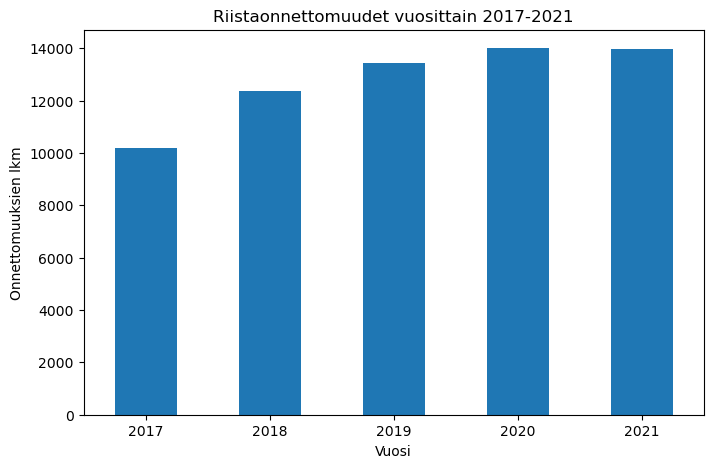

In [71]:
# Riistaonnettomuuksia yhteensä vuosittain:
vuosittain = tulokset.groupby('vuosi')['onnettomuuksien_lkm'].sum()

# Pylväskaavio:
vuosittain.plot(kind='bar', title = "Riistaonnettomuudet vuosittain 2017-2021", figsize=(8, 5))

plt.ylabel('Onnettomuuksien lkm')
plt.xlabel('Vuosi')
plt.xticks(rotation = 0)
# plt.grid(axis = 'y', color = "lightgray")

plt.show()

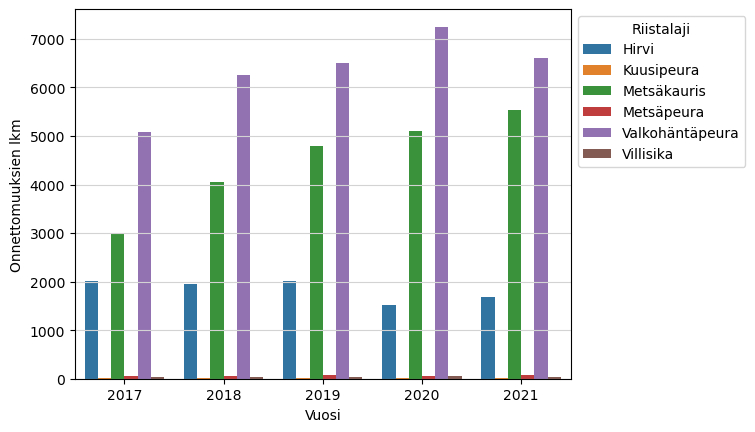

In [73]:
# Pylväskaaviot joka riistalajille:
ax = sns.barplot(tulokset, x = 'vuosi', y = 'onnettomuuksien_lkm', hue = 'riistalajiNimi')

# Asetetaan selitelaatikon paikka kaavion ulkopuolelle:
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), title = 'Riistalaji')

plt.ylabel('Onnettomuuksien lkm')
plt.xlabel('Vuosi')
plt.grid(axis = 'y', color = "lightgray")

plt.show()

Kaavoista nähdään, että riistaonnettomuudet ovat kasvaneet tarkastelujakson aikana noin 10 000 onnettomuudesta 14 000 onnettomuuteen vuodessa. Joka vuonna suurin osa onnettomuuksista on tapahtunut valkohäntäpeuran kanssa, ja toiseksi eniten onnettomuuksia on tapahtunut metsäkauriin kanssa. Jakson aikana metsäkaurisonnettomuudet ovat liki kaksinkertaistuneet, ja myös valkohäntäpeuraonnettomuudet ovat lisääntyneet aina vuoteen 2020 saakka. Hirvionnettomuuksien vuotuinen määrä sen sijaan on 2020-luvulla hieman vähentynyt aiempiin vuosiin verrattuna.